In [2]:
import numpy as np
import pandas as pd

from generate_viz import preprocess_data, df_to_coactivation_map, plot_coactivation_map

# Merging coactivation maps process

In [14]:
path = 'collected_data/2023_10_06_ac/ac_111.csv'
emgs = np.char.add('emg', np.arange(0, 8).astype(str))

In [15]:
df = preprocess_data(path)
cm = df_to_coactivation_map(df, metric='mean')

In [16]:
cm

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.037297,0.107786,0.111571,0.043422,0.026788,0.037235,0.039125,0.022860
1,0.154687,0.179192,0.393617,0.144505,0.044057,0.063912,0.107455,0.165977
2,0.386590,0.362220,0.215491,0.211367,0.058871,0.099698,0.174871,0.262357


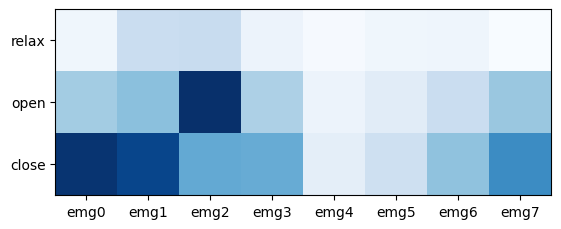

In [17]:
plot_coactivation_map(cm)

In [18]:
cm1_melted = pd.melt(cm.reset_index(), id_vars=['gt'])#.set_index(['gt','emg'])
cm1_melted

,gt,emg,value
0,0,emg0,0.037297
1,1,emg0,0.154687
2,2,emg0,0.386590
3,0,emg1,0.107786
4,1,emg1,0.179192
5,2,emg1,0.362220
6,0,emg2,0.111571
7,1,emg2,0.393617
8,2,emg2,0.215491
9,0,emg3,0.043422


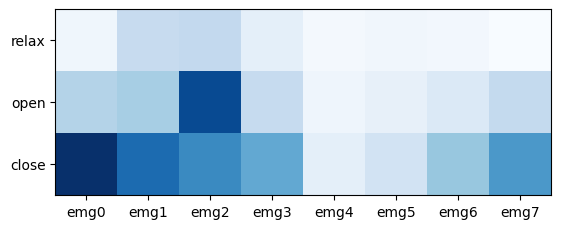

In [19]:
path2 = 'collected_data/2023_10_06_ac/ac_112.csv'
df2 = preprocess_data(path2)
cm2 = df_to_coactivation_map(df2, metric='mean')
plot_coactivation_map(cm2)

In [20]:
cm2_melted = pd.melt(cm2.reset_index(), id_vars=['gt'])#.set_index(['gt','emg'])
cm2_melted

,gt,emg,value
0,0,emg0,0.036271
1,1,emg0,0.123816
2,2,emg0,0.349742
3,0,emg1,0.103651
4,1,emg1,0.136802
5,2,emg1,0.275666
6,0,emg2,0.108182
7,1,emg2,0.316125
8,2,emg2,0.236641
9,0,emg3,0.054044


In [21]:
final_df = pd.merge(cm1_melted, cm2_melted, on = ['gt','emg'])
final_df

,gt,emg,value_x,value_y
0,0,emg0,0.037297,0.036271
1,1,emg0,0.154687,0.123816
2,2,emg0,0.386590,0.349742
3,0,emg1,0.107786,0.103651
4,1,emg1,0.179192,0.136802
5,2,emg1,0.362220,0.275666
6,0,emg2,0.111571,0.108182
7,1,emg2,0.393617,0.316125
8,2,emg2,0.215491,0.236641
9,0,emg3,0.043422,0.054044


In [22]:
test_merge = pd.DataFrame(final_df.set_index(['gt','emg']).mean(axis=1)).reset_index().pivot(index='gt', columns='emg', values=0)
test_merge

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.036784,0.105719,0.109876,0.048733,0.028944,0.036130,0.035674,0.023455
1,0.139251,0.157997,0.354871,0.124780,0.041649,0.057240,0.088084,0.136952
2,0.368166,0.318943,0.226066,0.203282,0.056575,0.092021,0.162621,0.240000


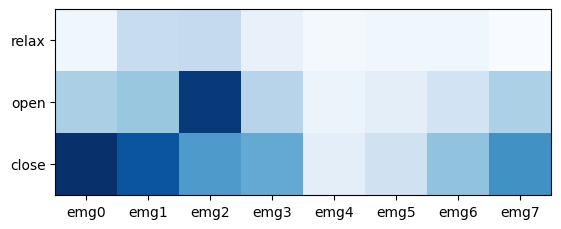

In [23]:
plot_coactivation_map(test_merge)

In [24]:
import re
bool(re.match(r'^p\d+$','p1'))

True

In [66]:
'10' not in ['11','12','13']

True

# Test script

In [37]:
# import os
# import pandas as pd
# import numpy as np
# import re

# from dataset_definition import left_right_hand_dict
# from generate_viz import preprocess_data, df_to_coactivation_map, plot_coactivation_map
 
# # create six dfs of flattened coactivation map df: (right, left)  x  (11, 12, 13)

# # iterate through

# df_r11, df_r12, df_r13, df_l11, df_l12, df_l13 = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

# df_dict = {
#     ('right', '11'): df_r11,
#     ('right', '13'): df_r13,
#     ('left', '11'): df_l11,
#     ('left', '13'): df_l13,
# }

# unknown = []
# hand = ''


# data_dir = 'collected_data'
# for root, subdirs, files in os.walk(data_dir):
#     print(root)
#     if root != data_dir and root[15] == '2':
#         print(f"\nIn subdirectory: {root}")
#         if (int(root[15:19]) > 2022) and files: 
#             print("Files:")
#             subject_id = root.split('/')[-1].split('_')[-1]
#             if subject_id not in left_right_hand_dict:
#                 hand = 'unknown'
#                 unknown.append(subject_id)
#                 continue
#             elif bool(re.match(r'^p\d+$',subject_id)):
#                 # is patient, skip
#                 continue
#             else:
#                 if left_right_hand_dict[subject_id] == "left":
#                     hand = 'left'
#                 else: 
#                     hand = 'right'

#             for file in files:
#                 if file[-4:] == '.csv':
#                     print(file)
#                     # extract 11 or 13
#                     n = file[-7:-5]
#                     print(n)
#                     if n not in ['11','13']:
#                         continue
                    
#                     # get main df to append to
#                     df_main = df_dict.get((hand,n))
#                     # display(df_main)

#                     # get map of individual dataset
#                     path = os.path.join(f"{root}", file)
#                     print(path)
#                     df = preprocess_data(path)
#                     cm = df_to_coactivation_map(df, metric='mean')
#                     plot_coactivation_map(cm)
#                     cm_melted = pd.melt(cm.reset_index(), id_vars=['gt']).rename(columns={'value':path})
#                     # display(cm_melted)

#                     # merge to master dataset to average later
#                     if df_main.empty:
#                         print('HERE')
#                         df_dict[(hand, n)] = cm_melted  # Update directly in the dictionary
#                     else:
#                         df_dict[(hand, n)] = pd.merge(df_main, cm_melted, on=['gt', 'emg'])
                    
#                     display(df_dict[(hand, n)])  # Display updated DataFrame



In [101]:
# final mean operation
for key, final_df in df_dict.items():
    final_df = pd.DataFrame(final_df.set_index(['gt','emg']).mean(axis=1)).reset_index().pivot(index='gt', columns='emg', values=0)

# save to csvs
df_r11.to_csv('general_coactivation_maps/df_r11.csv')
df_r12.to_csv('general_coactivation_maps/df_r12.csv')
df_r13.to_csv('general_coactivation_maps/df_r13.csv')
df_l11.to_csv('general_coactivation_maps/df_l11.csv')
df_l12.to_csv('general_coactivation_maps/df_l12.csv')
df_l13.to_csv('general_coactivation_maps/df_l13.csv')

OSError: Cannot save file into a non-existent directory: 'general_coactivation_maps'

In [90]:
df_l11

""


In [98]:
for key, final_df in df_dict.items():
    display(final_df)

,gt,emg,collected_data/2023_10_23_xw/xw_111.csv,collected_data/2023_10_23_xw/xw_112.csv,collected_data/2023_10_25_ae/ae_111.csv,collected_data/2023_10_25_ae/ae_112.csv,collected_data/2023_11_03_hr/hr_111.csv,collected_data/2023_11_03_hr/hr_112.csv,collected_data/2023_10_07_cl/cl_111.csv,collected_data/2023_10_07_cl/cl_112.csv,...,collected_data/2023_10_20_gk/gk_112.csv,collected_data/2023_10_20_jp/jp_112.csv,collected_data/2023_10_20_jp/jp_111.csv,collected_data/2023_10_06_ac/ac_111.csv,collected_data/2023_10_06_ac/ac_112.csv,collected_data/2023_10_23_yc/yc_112.csv,collected_data/2023_10_23_yc/yc_113.csv,collected_data/2023_10_23_yc/yc_111.csv,collected_data/2023_11_03_is/is_112.csv,collected_data/2023_11_03_is/is_111.csv
0,0,emg0,0.029049,0.024044,0.016905,0.015081,0.025874,0.027639,0.013987,0.013717,...,0.018534,0.023097,0.028486,0.037297,0.036271,0.080493,0.056228,0.089054,0.025892,0.022900
1,1,emg0,0.056639,0.047222,0.039558,0.035404,0.047168,0.051773,0.041105,0.039798,...,0.023995,0.070023,0.103562,0.154687,0.123816,0.101488,0.076904,0.095746,0.071567,0.065274
2,2,emg0,0.157644,0.149159,0.061116,0.079550,0.095370,0.093958,0.167106,0.164922,...,0.146988,0.391467,0.439657,0.386590,0.349742,0.167949,0.123601,0.185757,0.204508,0.189524
3,0,emg1,0.070959,0.056540,0.018226,0.015911,0.028564,0.028270,0.017904,0.014593,...,0.025588,0.038075,0.045292,0.107786,0.103651,0.041768,0.039716,0.077410,0.022737,0.019113
4,1,emg1,0.177700,0.160651,0.027680,0.027459,0.092666,0.093499,0.093366,0.072614,...,0.052111,0.217335,0.285671,0.179192,0.136802,0.054916,0.067802,0.089435,0.173625,0.165189
5,2,emg1,0.135926,0.129742,0.033242,0.042478,0.067373,0.064821,0.080594,0.093770,...,0.087552,0.212246,0.294123,0.362220,0.275666,0.048870,0.049368,0.074250,0.140044,0.120947
6,0,emg2,0.040226,0.031061,0.015194,0.014662,0.036606,0.043023,0.041643,0.016232,...,0.057182,0.048927,0.043603,0.111571,0.108182,0.048171,0.038899,0.063835,0.019739,0.020457
7,1,emg2,0.227580,0.206203,0.026355,0.028627,0.162766,0.169257,0.278835,0.240244,...,0.277015,0.583356,0.651296,0.393617,0.316125,0.281010,0.232213,0.277384,0.401704,0.396817
8,2,emg2,0.100010,0.097462,0.023414,0.028081,0.043247,0.042625,0.204342,0.146083,...,0.191696,0.186809,0.168217,0.215491,0.236641,0.166417,0.137506,0.135442,0.080075,0.061668
9,0,emg3,0.022876,0.022262,0.020286,0.018548,0.026383,0.021845,0.017892,0.014545,...,0.020528,0.022233,0.021965,0.043422,0.054044,0.028623,0.023965,0.032226,0.027088,0.057241


""


,gt,emg,collected_data/2023_10_23_xw/xw_131.csv,collected_data/2023_10_23_xw/xw_132.csv,collected_data/2023_10_25_ae/ae_131.csv,collected_data/2023_10_25_ae/ae_132.csv,collected_data/2023_11_03_hr/hr_131.csv,collected_data/2023_11_03_hr/hr_132.csv,collected_data/2023_10_07_cl/cl_131.csv,collected_data/2023_10_07_cl/cl_132.csv,...,collected_data/2023_10_20_gk/gk_131.csv,collected_data/2023_10_20_gk/gk_132.csv,collected_data/2023_10_20_jp/jp_132.csv,collected_data/2023_10_20_jp/jp_131.csv,collected_data/2023_10_06_ac/ac_131.csv,collected_data/2023_10_06_ac/ac_132.csv,collected_data/2023_10_23_yc/yc_132.csv,collected_data/2023_10_23_yc/yc_131.csv,collected_data/2023_11_03_is/is_132.csv,collected_data/2023_11_03_is/is_131.csv
0,0,emg0,0.017419,0.018406,0.025340,0.026344,0.056473,0.043425,0.015425,0.015311,...,0.018143,0.017621,0.036482,0.028788,0.042692,0.043653,0.024815,0.027683,0.018330,0.017975
1,1,emg0,0.045199,0.041844,0.040580,0.047807,0.073628,0.053254,0.034027,0.037516,...,0.027009,0.028868,0.088524,0.087976,0.080247,0.081879,0.034964,0.039939,0.027491,0.034301
2,2,emg0,0.138273,0.157351,0.117174,0.138528,0.101621,0.097522,0.159432,0.147840,...,0.180770,0.181275,0.384878,0.433114,0.271723,0.299277,0.205557,0.220618,0.122856,0.256106
3,0,emg1,0.022074,0.021372,0.026128,0.025399,0.052234,0.050298,0.016717,0.016211,...,0.019167,0.020009,0.097693,0.057516,0.183371,0.189817,0.028550,0.040670,0.024519,0.016815
4,1,emg1,0.083935,0.067366,0.025720,0.026198,0.103522,0.098338,0.107163,0.095966,...,0.049241,0.056319,0.263013,0.229850,0.207545,0.231981,0.062048,0.042745,0.106956,0.082150
5,2,emg1,0.095650,0.100959,0.054550,0.066108,0.080972,0.080785,0.111443,0.116182,...,0.052512,0.054939,0.225909,0.197996,0.248090,0.261513,0.043316,0.036370,0.081106,0.110338
6,0,emg2,0.034936,0.028697,0.018147,0.017431,0.037831,0.054102,0.019272,0.018554,...,0.024673,0.028742,0.118651,0.137649,0.124261,0.153960,0.047732,0.050133,0.041749,0.032215
7,1,emg2,0.212612,0.215792,0.029549,0.030329,0.164237,0.159648,0.246719,0.246103,...,0.264807,0.289725,0.539515,0.573786,0.278198,0.332172,0.281676,0.305239,0.321220,0.345961
8,2,emg2,0.092237,0.145932,0.032955,0.034244,0.047477,0.046728,0.132177,0.132379,...,0.077198,0.088919,0.215353,0.231056,0.186093,0.175436,0.124872,0.116055,0.078145,0.048435
9,0,emg3,0.025555,0.026754,0.021902,0.024559,0.032443,0.037421,0.019215,0.019479,...,0.018383,0.019718,0.041876,0.046133,0.047400,0.052976,0.026861,0.026030,0.103194,0.117145


,gt,emg,collected_data/2023_10_16_fa/fa_111.csv,collected_data/2023_10_16_fa/fa_112.csv,collected_data/2023_11_02_as/as_112.csv,collected_data/2023_11_02_as/as_111.csv,collected_data/2023_11_02_im/im_111.csv,collected_data/2023_11_02_im/im_112.csv,collected_data/2023_10_27_si/si_111.csv,collected_data/2023_10_27_si/si_112.csv,collected_data/2023_10_27_jo/jo_112.csv,collected_data/2023_10_27_jo/jo_111.csv,collected_data/2023_10_19_wx/wx_112.csv,collected_data/2023_10_19_wx/wx_111.csv
0,0,emg0,0.013152,0.013006,0.017282,0.015108,0.013314,0.013091,0.012876,0.012994,0.015477,0.015151,0.015821,0.014624
1,1,emg0,0.019839,0.019007,0.028061,0.020563,0.017372,0.018112,0.015554,0.016544,0.014349,0.066606,0.089502,0.107677
2,2,emg0,0.035936,0.066450,0.060673,0.037189,0.017793,0.016338,0.018662,0.016930,0.042642,0.200831,0.050059,0.077645
3,0,emg1,0.014588,0.014327,0.016936,0.015462,0.015498,0.014755,0.014686,0.014490,0.015025,0.015894,0.015509,0.014869
4,1,emg1,0.023842,0.022059,0.023048,0.020418,0.023389,0.026142,0.020602,0.022014,0.016638,0.034855,0.023967,0.025271
5,2,emg1,0.032494,0.044720,0.025902,0.020317,0.021397,0.024544,0.020389,0.020308,0.021332,0.149918,0.023522,0.029894
6,0,emg2,0.014797,0.014261,0.018853,0.018817,0.018807,0.016023,0.020695,0.018425,0.014056,0.014727,0.016140,0.015593
7,1,emg2,0.030052,0.028080,0.036964,0.036706,0.038054,0.049253,0.038164,0.039084,0.020186,0.027012,0.032760,0.034324
8,2,emg2,0.053619,0.047675,0.034180,0.027325,0.039749,0.063669,0.041228,0.039877,0.033230,0.078896,0.036619,0.048031
9,0,emg3,0.016638,0.015008,0.042934,0.027137,0.026211,0.018370,0.023718,0.020747,0.017019,0.019702,0.023457,0.020741


""


,gt,emg,collected_data/2023_10_16_fa/fa_131.csv,collected_data/2023_10_16_fa/fa_132.csv,collected_data/2023_11_02_as/as_132.csv,collected_data/2023_11_02_as/as_131.csv,collected_data/2023_11_02_im/im_131.csv,collected_data/2023_11_02_im/im_132.csv,collected_data/2023_10_27_si/si_131.csv,collected_data/2023_10_27_si/si_132.csv,collected_data/2023_10_27_jo/jo_132.csv,collected_data/2023_10_27_jo/jo_131.csv,collected_data/2023_10_19_wx/wx_132.csv,collected_data/2023_10_19_wx/wx_131.csv
0,0,emg0,0.014387,0.016352,0.021315,0.021347,0.016180,0.017209,0.014116,0.013750,0.016544,0.016435,0.018484,0.019472
1,1,emg0,0.017698,0.020109,0.021512,0.027668,0.018995,0.019069,0.017645,0.016318,0.019864,0.016983,0.088578,0.067359
2,2,emg0,0.058793,0.071163,0.093720,0.111089,0.017507,0.018774,0.053934,0.044129,0.153667,0.068634,0.075528,0.070137
3,0,emg1,0.016062,0.019358,0.019196,0.019527,0.024561,0.026250,0.015500,0.015736,0.016353,0.014907,0.018537,0.022278
4,1,emg1,0.021071,0.023906,0.020645,0.024200,0.027410,0.028558,0.022827,0.023468,0.022885,0.019640,0.022230,0.024484
5,2,emg1,0.041596,0.047487,0.030456,0.035641,0.026643,0.029547,0.029639,0.032445,0.091101,0.025422,0.027420,0.029703
6,0,emg2,0.018960,0.024177,0.025311,0.022077,0.050637,0.049054,0.021419,0.019764,0.015439,0.015871,0.020399,0.023636
7,1,emg2,0.026796,0.030800,0.029408,0.034409,0.045091,0.043973,0.043889,0.049261,0.026159,0.025107,0.026424,0.028700
8,2,emg2,0.062133,0.064199,0.037241,0.045736,0.061630,0.062643,0.060847,0.069903,0.046173,0.032886,0.036565,0.041094
9,0,emg3,0.029356,0.041448,0.067169,0.044512,0.060139,0.049348,0.029105,0.021107,0.018126,0.018609,0.042601,0.035108


,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.025710,0.039333,0.034435,0.026754,0.020174,0.019623,0.023217,0.015855
1,0.061667,0.108377,0.282478,0.118870,0.041623,0.046435,0.072957,0.095942
2,0.181203,0.130855,0.125304,0.126000,0.044159,0.047217,0.106348,0.103667


,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.021091,0.046606,0.045333,0.034288,0.020576,0.020364,0.021636,0.014909
1,0.045424,0.111606,0.266864,0.131758,0.044758,0.046485,0.068273,0.099909
2,0.198758,0.127545,0.104182,0.129167,0.047939,0.045576,0.097818,0.126045


,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.013278,0.014611,0.015722,0.016444,0.027556,0.017389,0.013667,0.013556
1,0.033833,0.021778,0.032000,0.109111,0.275472,0.111806,0.035611,0.032528
2,0.048222,0.035389,0.042222,0.132583,0.152944,0.130722,0.146444,0.089611


,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.015444,0.018222,0.024056,0.031528,0.035500,0.017944,0.014944,0.014444
1,0.027778,0.022083,0.031889,0.105833,0.233583,0.103111,0.036389,0.049056
2,0.065500,0.035667,0.048889,0.134417,0.147917,0.140611,0.176111,0.170583


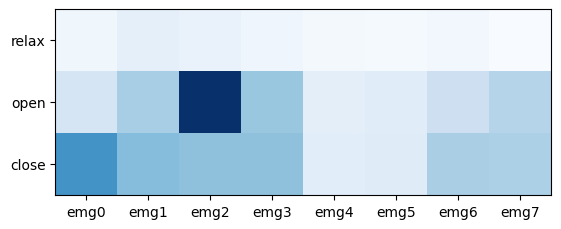

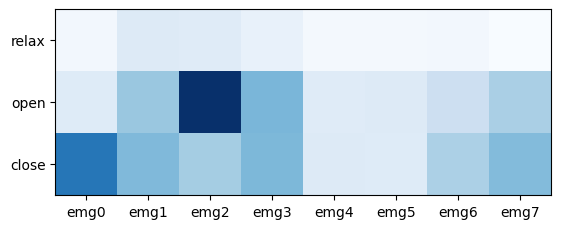

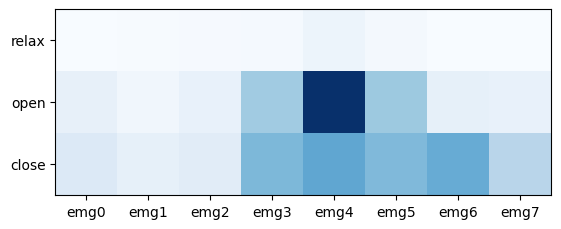

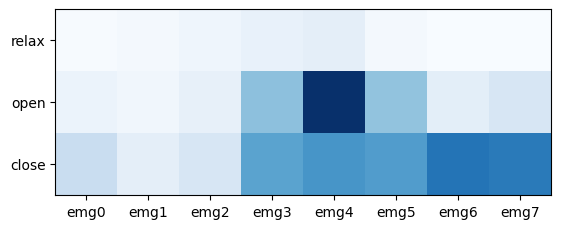

In [5]:
csvs = ['right11.csv', 'right13.csv', 'left11.csv', 'left13.csv']
for csv in csvs:
    cmap = pd.read_csv(csv).set_index('gt')
    display(cmap)
    plot_coactivation_map(cmap, metric='median')